In [58]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

### N-page internet
Let us consider an internet of n pages

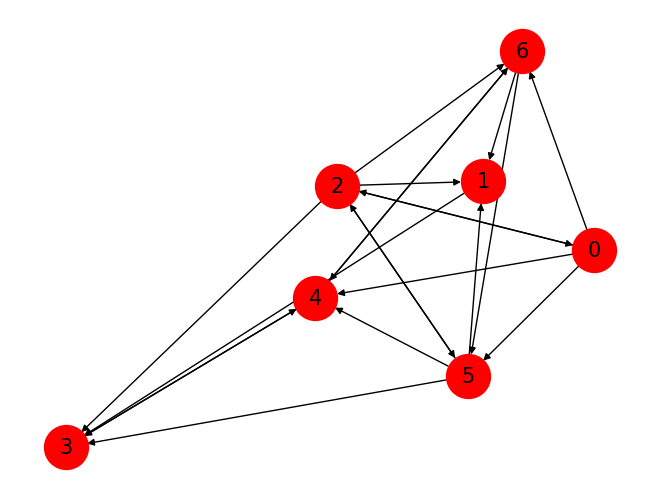

In [59]:
G = nx.erdos_renyi_graph(7, p=0.5, directed=True)
nx.draw(G, with_labels=True, node_color='red', node_size=1000, font_size=15, )

We create an adjancency matrix $A$ to represent this network
$A_{1,j} = 1$ if j has a link to page i and $0$ otherwise

In [60]:
adj_matrix = nx.to_numpy_array(G, dtype=float)
adj_matrix

array([[0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0.]])

We wish to associate a ranking $r_i$ to page $i$ in such a way that $r_i > r_j$ indicates that page i is more popular than page $j$

In [61]:
stochastic_matrix = adj_matrix / adj_matrix.sum(axis=0, keepdims=True)
stochastic_matrix[np.isnan(stochastic_matrix)] = 0
stochastic_matrix # Column stochastic matrix

array([[0.        , 0.        , 0.5       , 0.        , 0.25      ,
        0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.        ],
       [1.        , 0.33333333, 0.        , 0.25      , 0.        ,
        0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.25      ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.33333333],
       [0.        , 0.33333333, 0.5       , 0.25      , 0.25      ,
        0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.25      ,
        0.33333333, 0.        ]])

In [62]:
def power_method(A, num_iter=100, tol=1e-6):
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)

    for _ in range(num_iter):
        v_next = np.dot(A, v)
        v_next = v_next / np.linalg.norm(v_next)
        if np.linalg.norm(v_next - v) < tol:
            break
        v = v_next

    return  v


#### Relevance of each node on the network

In [63]:
eigenvector = power_method(stochastic_matrix)
eigenvector /= eigenvector.sum()
eigenvector

array([0.29503634, 0.00167318, 0.39040698, 0.00669267, 0.02677083,
       0.20412727, 0.07529272])